<a href="https://colab.research.google.com/github/TonyIssacJames/eva04_mar_2020_public/blob/master/Assignment_05_trial/EVA4S5F1_FashionM_setup_runall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

- we use fashionMNSIT
- same models we had before we are running using fashion MNSIT to know the effects
- we can collect data for all the model accuracy, losses for test and train

# Import Libraries

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [2]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.FashionMNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

g_mean = torch.mean(exp_data)
g_std  = torch.std(exp_data)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.2859)
 - std: tensor(0.3530)
 - var: tensor(0.1246)


In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((g_mean,), (g_std,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((g_mean,), (g_std,))
                                       ])


print("mean = ", g_mean)
print("std  = ", g_std)

mean =  tensor(0.2859)
std  =  tensor(0.3530)


# Dataset and Creating Train/Test Split

In [0]:
train = datasets.FashionMNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.FashionMNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.8099)
 - max: tensor(2.0228)
 - mean: tensor(0.0004)
 - std: tensor(1.)
 - var: tensor(1.)
torch.Size([128, 1, 28, 28])
torch.Size([128])


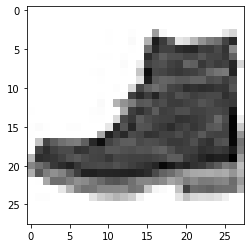

In [6]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

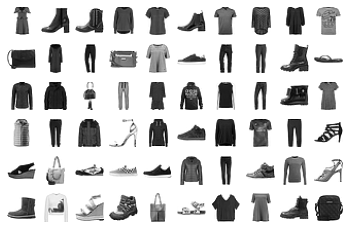

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# The model 01
Let's start with the model we first saw

In [0]:
class Net_01(nn.Module):
    def __init__(self):
        super(Net_01, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1) #input -? OUtput? RF
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv5 = nn.Conv2d(256, 512, 3)
        self.conv6 = nn.Conv2d(512, 1024, 3)
        self.conv7 = nn.Conv2d(1024, 10, 3)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        # x = F.relu(self.conv7(x))
        x = self.conv7(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## Model 02

- we are trying to get a skeletorn here

In [0]:
class Net_02(nn.Module):
    def __init__(self):
        super(Net_02, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 24
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 22

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7

        # OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(7, 7), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # output_size = 1

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## Model 03

- Trim the model as much as possible, keeping the structure same

In [0]:
class Net_03(nn.Module):
    def __init__(self):
        super(Net_03, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            
            nn.ReLU()
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            
            nn.ReLU()
        ) # output_size = 24
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            
            
            nn.ReLU()
        ) # output_size = 22

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            
            
            nn.ReLU()
        ) # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            
            
            nn.ReLU()
        ) # output_size = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7

        # OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(7, 7), padding=0, bias=False),
            # nn.BatchNorm2d(10), NEVER
            # nn.ReLU() NEVER!
        ) # output_size = 1

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## Model 04

- same parameters as Model 03 (except BN added some parameters)
- increase capacity
- added Batch Normalisation

In [0]:
class Net_04(nn.Module):
    def __init__(self):
        super(Net_04, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 24
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        ) # output_size = 22

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        ) # output_size = 7

        # OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 7
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(7, 7), padding=0, bias=False),
            # nn.BatchNorm2d(10), NEVER
            # nn.ReLU() NEVER!
        ) # output_size = 1

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## Model 05

- same as Model 04 except for dropout
- same number of parameters as Model 04
- dropout is only added to two layers not to every layer

In [0]:
class Net_05(nn.Module):
    def __init__(self):
        super(Net_05, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 24
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        ) # output_size = 22

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        ) # output_size = 7

        # OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 7
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(7, 7), padding=0, bias=False),
            # nn.BatchNorm2d(10), NEVER
            # nn.ReLU() NEVER!
        ) # output_size = 1

        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.dropout(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.dropout(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## Model 06

- removed FCL with GAP
- parameter reduced to 6070
- the accuracy reduces because of two reason
    - there should be a layer after GAP
    - we comparing n/w with 6070 parameters with a n/w with 10970 parameters

In [0]:
class Net_06(nn.Module):
    def __init__(self):
        super(Net_06, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 24
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        ) # output_size = 22

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        ) # output_size = 7

        # OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 7
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=7)
        ) # output_size = 1

        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.dropout(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.dropout(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## Model 07

- the skelton is same as Model 06 but added more kernels

- the Model 06 has the following problems due to which
    - the accuracy reduces because of two reason
      - there should be a layer after GAP
      - we comparing n/w with 6070 parameters with a n/w with 10970 parameters (Fixed IT w/o chaning skeleton)

In [0]:
class Net_07(nn.Module):
    def __init__(self):
        super(Net_07, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 24
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        ) # output_size = 22

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        ) # output_size = 7

        # OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU()
        ) # output_size = 5
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 5
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=5)
        ) # output_size = 1

        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.dropout(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.dropout(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = self.gap(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## Model 08

- the skelton is same as Model 06/07 but added some 1x1 kernels as transition layers

- changed position of maxpooling
- added dropout everywhere (Conv, Relu, BN, Dropout)
- added a layer after GAP

In [0]:
dropout_value = 0.1
class Net_08(nn.Module):
    def __init__(self):
        super(Net_08, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) # output_size = 24

        # TRANSITION BLOCK 1
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 24
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 10
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 8
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 6
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 6
        
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=6)
        ) # output_size = 1

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.BatchNorm2d(10),
            # nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) 


        self.dropout = nn.Dropout(dropout_value)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)        
        x = self.convblock8(x)

        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

#Model 09

- Model 09 is ditto as Model 08

- while running Model 09 we just Image Augmentation

In [0]:
import torch.nn.functional as F
dropout_value = 0.1
class Net_09(nn.Module):
    def __init__(self):
        super(Net_09, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) # output_size = 24

        # TRANSITION BLOCK 1
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 24
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 10
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 8
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 6
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 6
        
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=6)
        ) # output_size = 1

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.BatchNorm2d(10),
            # nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) 


        self.dropout = nn.Dropout(dropout_value)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)        
        x = self.convblock8(x)

        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [17]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)


cuda


## Model 01 parameters

In [18]:

Net_Array=[Net_01, Net_02, Net_03, Net_04, Net_05, Net_06, Net_07, Net_08]

for i, Net_X in enumerate(Net_Array):
  print("Model_0"+str(i + 1),":  Summary")
  model = Net_X().to(device)
  summary(model, input_size=(1, 28, 28))
  for n in range(5):
    print()

Model_01 :  Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-----------------

# Training and Testing

All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments. 

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [0]:
from tqdm import tqdm

#train_losses = []
#test_losses = []
#train_acc = []
#test_acc = []

def train(model, device, train_loader, optimizer, epoch, loss_array, acc_array):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    loss_array.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    acc_array.append(100*correct/processed)

def test(model, device, test_loader, loss_array, acc_array):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    loss_array.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Test Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    acc_array.append(100. * correct / len(test_loader.dataset))

# Let's Train and test our model

In [20]:
Net_Array=[Net_01, Net_02, Net_03, Net_04, Net_05, Net_06, Net_07, Net_08]

#collect all the parameters

train_losses = []
test_losses  = []
train_acc    = []
test_acc     = []


for i, Net_X in enumerate(Net_Array):
  print("Model_0"+str(i + 1),":  Training + Testing")
  model = Net_X().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  EPOCHS = 14

  train_losses.append([])
  test_losses.append([])
  train_acc.append([])
  test_acc.append([])

  for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses[i], train_acc[i])
    test(model, device, test_loader, test_losses[i], test_acc[i])

  for n in range(5):
    print()

Model_01 :  Training + Testing


  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.4110090434551239 Batch_id=468 Accuracy=72.52: 100%|██████████| 469/469 [00:18<00:00, 25.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4145, Test Accuracy: 8476/10000 (84.76%)

EPOCH: 1


Loss=0.4724867343902588 Batch_id=468 Accuracy=86.95: 100%|██████████| 469/469 [00:18<00:00, 25.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3545, Test Accuracy: 8682/10000 (86.82%)

EPOCH: 2


Loss=0.25510862469673157 Batch_id=468 Accuracy=89.22: 100%|██████████| 469/469 [00:19<00:00, 24.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3097, Test Accuracy: 8860/10000 (88.60%)

EPOCH: 3


Loss=0.32187536358833313 Batch_id=468 Accuracy=90.52: 100%|██████████| 469/469 [00:19<00:00, 24.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3225, Test Accuracy: 8843/10000 (88.43%)

EPOCH: 4


Loss=0.2169731855392456 Batch_id=468 Accuracy=91.33: 100%|██████████| 469/469 [00:19<00:00, 24.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2696, Test Accuracy: 9019/10000 (90.19%)

EPOCH: 5


Loss=0.21691280603408813 Batch_id=468 Accuracy=92.30: 100%|██████████| 469/469 [00:19<00:00, 24.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2494, Test Accuracy: 9069/10000 (90.69%)

EPOCH: 6


Loss=0.14880110323429108 Batch_id=468 Accuracy=92.83: 100%|██████████| 469/469 [00:19<00:00, 24.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2462, Test Accuracy: 9113/10000 (91.13%)

EPOCH: 7


Loss=0.07901220768690109 Batch_id=468 Accuracy=93.48: 100%|██████████| 469/469 [00:19<00:00, 24.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2480, Test Accuracy: 9126/10000 (91.26%)

EPOCH: 8


Loss=0.09741506725549698 Batch_id=468 Accuracy=94.13: 100%|██████████| 469/469 [00:19<00:00, 24.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2406, Test Accuracy: 9159/10000 (91.59%)

EPOCH: 9


Loss=0.20554298162460327 Batch_id=468 Accuracy=94.69: 100%|██████████| 469/469 [00:19<00:00, 24.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2475, Test Accuracy: 9130/10000 (91.30%)

EPOCH: 10


Loss=0.1114504411816597 Batch_id=468 Accuracy=95.25: 100%|██████████| 469/469 [00:19<00:00, 24.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2571, Test Accuracy: 9102/10000 (91.02%)

EPOCH: 11


Loss=0.14259666204452515 Batch_id=468 Accuracy=95.79: 100%|██████████| 469/469 [00:19<00:00, 24.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2404, Test Accuracy: 9181/10000 (91.81%)

EPOCH: 12


Loss=0.07397537678480148 Batch_id=468 Accuracy=96.28: 100%|██████████| 469/469 [00:19<00:00, 24.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2669, Test Accuracy: 9115/10000 (91.15%)

EPOCH: 13


Loss=0.1325448751449585 Batch_id=468 Accuracy=96.98: 100%|██████████| 469/469 [00:19<00:00, 24.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2673, Test Accuracy: 9221/10000 (92.21%)






Model_02 :  Training + Testing
EPOCH: 0


Loss=0.5451171398162842 Batch_id=468 Accuracy=44.95: 100%|██████████| 469/469 [00:11<00:00, 40.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6111, Test Accuracy: 7740/10000 (77.40%)

EPOCH: 1


Loss=0.3660413324832916 Batch_id=468 Accuracy=81.06: 100%|██████████| 469/469 [00:11<00:00, 40.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4843, Test Accuracy: 8289/10000 (82.89%)

EPOCH: 2


Loss=0.2758040726184845 Batch_id=468 Accuracy=84.17: 100%|██████████| 469/469 [00:11<00:00, 39.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4322, Test Accuracy: 8456/10000 (84.56%)

EPOCH: 3


Loss=0.46251019835472107 Batch_id=468 Accuracy=85.81: 100%|██████████| 469/469 [00:11<00:00, 39.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4117, Test Accuracy: 8474/10000 (84.74%)

EPOCH: 4


Loss=0.30593088269233704 Batch_id=468 Accuracy=86.86: 100%|██████████| 469/469 [00:11<00:00, 40.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3925, Test Accuracy: 8570/10000 (85.70%)

EPOCH: 5


Loss=0.29490116238594055 Batch_id=468 Accuracy=87.87: 100%|██████████| 469/469 [00:11<00:00, 40.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3535, Test Accuracy: 8708/10000 (87.08%)

EPOCH: 6


Loss=0.40007057785987854 Batch_id=468 Accuracy=88.63: 100%|██████████| 469/469 [00:11<00:00, 39.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3324, Test Accuracy: 8799/10000 (87.99%)

EPOCH: 7


Loss=0.1778566837310791 Batch_id=468 Accuracy=89.06: 100%|██████████| 469/469 [00:11<00:00, 40.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3147, Test Accuracy: 8835/10000 (88.35%)

EPOCH: 8


Loss=0.30205047130584717 Batch_id=468 Accuracy=89.75: 100%|██████████| 469/469 [00:11<00:00, 40.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3191, Test Accuracy: 8845/10000 (88.45%)

EPOCH: 9


Loss=0.2740623950958252 Batch_id=468 Accuracy=90.18: 100%|██████████| 469/469 [00:11<00:00, 39.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2988, Test Accuracy: 8902/10000 (89.02%)

EPOCH: 10


Loss=0.27778539061546326 Batch_id=468 Accuracy=90.61: 100%|██████████| 469/469 [00:11<00:00, 41.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3003, Test Accuracy: 8918/10000 (89.18%)

EPOCH: 11


Loss=0.22409175336360931 Batch_id=468 Accuracy=90.85: 100%|██████████| 469/469 [00:11<00:00, 41.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2781, Test Accuracy: 8999/10000 (89.99%)

EPOCH: 12


Loss=0.16094772517681122 Batch_id=468 Accuracy=91.36: 100%|██████████| 469/469 [00:11<00:00, 41.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2794, Test Accuracy: 8990/10000 (89.90%)

EPOCH: 13


Loss=0.32742857933044434 Batch_id=468 Accuracy=91.70: 100%|██████████| 469/469 [00:11<00:00, 41.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2842, Test Accuracy: 8990/10000 (89.90%)






Model_03 :  Training + Testing
EPOCH: 0


Loss=2.2843849658966064 Batch_id=468 Accuracy=11.36: 100%|██████████| 469/469 [00:10<00:00, 45.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2890, Test Accuracy: 1568/10000 (15.68%)

EPOCH: 1


Loss=0.553589403629303 Batch_id=468 Accuracy=68.02: 100%|██████████| 469/469 [00:10<00:00, 44.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6268, Test Accuracy: 7724/10000 (77.24%)

EPOCH: 2


Loss=0.5237421989440918 Batch_id=468 Accuracy=81.07: 100%|██████████| 469/469 [00:10<00:00, 44.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4930, Test Accuracy: 8177/10000 (81.77%)

EPOCH: 3


Loss=0.3917728662490845 Batch_id=468 Accuracy=83.41: 100%|██████████| 469/469 [00:10<00:00, 44.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4535, Test Accuracy: 8372/10000 (83.72%)

EPOCH: 4


Loss=0.4447093904018402 Batch_id=468 Accuracy=84.82: 100%|██████████| 469/469 [00:10<00:00, 45.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4296, Test Accuracy: 8459/10000 (84.59%)

EPOCH: 5


Loss=0.42764368653297424 Batch_id=468 Accuracy=85.45: 100%|██████████| 469/469 [00:10<00:00, 45.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4194, Test Accuracy: 8445/10000 (84.45%)

EPOCH: 6


Loss=0.40966108441352844 Batch_id=468 Accuracy=86.25: 100%|██████████| 469/469 [00:10<00:00, 45.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4016, Test Accuracy: 8499/10000 (84.99%)

EPOCH: 7


Loss=0.33491790294647217 Batch_id=468 Accuracy=86.79: 100%|██████████| 469/469 [00:10<00:00, 45.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4011, Test Accuracy: 8489/10000 (84.89%)

EPOCH: 8


Loss=0.37072572112083435 Batch_id=468 Accuracy=87.42: 100%|██████████| 469/469 [00:10<00:00, 45.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3696, Test Accuracy: 8661/10000 (86.61%)

EPOCH: 9


Loss=0.20630882680416107 Batch_id=468 Accuracy=88.02: 100%|██████████| 469/469 [00:10<00:00, 46.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3479, Test Accuracy: 8742/10000 (87.42%)

EPOCH: 10


Loss=0.3809829652309418 Batch_id=468 Accuracy=88.47: 100%|██████████| 469/469 [00:10<00:00, 46.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3663, Test Accuracy: 8694/10000 (86.94%)

EPOCH: 11


Loss=0.1706404685974121 Batch_id=468 Accuracy=88.92: 100%|██████████| 469/469 [00:10<00:00, 46.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3657, Test Accuracy: 8684/10000 (86.84%)

EPOCH: 12


Loss=0.3426246643066406 Batch_id=468 Accuracy=89.09: 100%|██████████| 469/469 [00:09<00:00, 46.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3450, Test Accuracy: 8699/10000 (86.99%)

EPOCH: 13


Loss=0.3114223778247833 Batch_id=468 Accuracy=89.33: 100%|██████████| 469/469 [00:10<00:00, 46.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3196, Test Accuracy: 8827/10000 (88.27%)






Model_04 :  Training + Testing
EPOCH: 0


Loss=0.4032350480556488 Batch_id=468 Accuracy=81.90: 100%|██████████| 469/469 [00:10<00:00, 43.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3650, Test Accuracy: 8676/10000 (86.76%)

EPOCH: 1


Loss=0.4534246027469635 Batch_id=468 Accuracy=88.46: 100%|██████████| 469/469 [00:10<00:00, 43.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3204, Test Accuracy: 8832/10000 (88.32%)

EPOCH: 2


Loss=0.2507034242153168 Batch_id=468 Accuracy=89.62: 100%|██████████| 469/469 [00:10<00:00, 43.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2977, Test Accuracy: 8950/10000 (89.50%)

EPOCH: 3


Loss=0.22686147689819336 Batch_id=468 Accuracy=90.25: 100%|██████████| 469/469 [00:10<00:00, 43.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2785, Test Accuracy: 8985/10000 (89.85%)

EPOCH: 4


Loss=0.25674569606781006 Batch_id=468 Accuracy=90.83: 100%|██████████| 469/469 [00:10<00:00, 43.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3004, Test Accuracy: 8921/10000 (89.21%)

EPOCH: 5


Loss=0.17535091936588287 Batch_id=468 Accuracy=91.23: 100%|██████████| 469/469 [00:11<00:00, 41.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2690, Test Accuracy: 9031/10000 (90.31%)

EPOCH: 6


Loss=0.31714287400245667 Batch_id=468 Accuracy=91.64: 100%|██████████| 469/469 [00:10<00:00, 43.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2746, Test Accuracy: 9015/10000 (90.15%)

EPOCH: 7


Loss=0.10636794567108154 Batch_id=468 Accuracy=91.70: 100%|██████████| 469/469 [00:10<00:00, 43.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2864, Test Accuracy: 8969/10000 (89.69%)

EPOCH: 8


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2711, Test Accuracy: 9017/10000 (90.17%)

EPOCH: 9


Loss=0.2408403903245926 Batch_id=468 Accuracy=92.32: 100%|██████████| 469/469 [00:10<00:00, 44.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2712, Test Accuracy: 9036/10000 (90.36%)

EPOCH: 10


Loss=0.13907068967819214 Batch_id=468 Accuracy=92.46: 100%|██████████| 469/469 [00:10<00:00, 43.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2691, Test Accuracy: 9046/10000 (90.46%)

EPOCH: 11


Loss=0.13642962276935577 Batch_id=468 Accuracy=92.57: 100%|██████████| 469/469 [00:10<00:00, 44.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2684, Test Accuracy: 9049/10000 (90.49%)

EPOCH: 12


Loss=0.4038463830947876 Batch_id=468 Accuracy=92.69: 100%|██████████| 469/469 [00:10<00:00, 43.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2642, Test Accuracy: 9068/10000 (90.68%)

EPOCH: 13


Loss=0.1787291169166565 Batch_id=468 Accuracy=92.92: 100%|██████████| 469/469 [00:10<00:00, 44.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2707, Test Accuracy: 9031/10000 (90.31%)






Model_05 :  Training + Testing
EPOCH: 0


Loss=0.47409287095069885 Batch_id=468 Accuracy=80.48: 100%|██████████| 469/469 [00:10<00:00, 43.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5672, Test Accuracy: 7977/10000 (79.77%)

EPOCH: 1


Loss=0.32722344994544983 Batch_id=468 Accuracy=86.98: 100%|██████████| 469/469 [00:10<00:00, 44.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4018, Test Accuracy: 8522/10000 (85.22%)

EPOCH: 2


Loss=0.3957061767578125 Batch_id=468 Accuracy=88.23: 100%|██████████| 469/469 [00:10<00:00, 44.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3649, Test Accuracy: 8705/10000 (87.05%)

EPOCH: 3


Loss=0.28789666295051575 Batch_id=468 Accuracy=88.91: 100%|██████████| 469/469 [00:10<00:00, 44.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3300, Test Accuracy: 8800/10000 (88.00%)

EPOCH: 4


Loss=0.24166381359100342 Batch_id=468 Accuracy=89.35: 100%|██████████| 469/469 [00:10<00:00, 44.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3606, Test Accuracy: 8696/10000 (86.96%)

EPOCH: 5


Loss=0.3579142093658447 Batch_id=468 Accuracy=89.58: 100%|██████████| 469/469 [00:10<00:00, 44.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3150, Test Accuracy: 8849/10000 (88.49%)

EPOCH: 6


Loss=0.28419798612594604 Batch_id=468 Accuracy=90.09: 100%|██████████| 469/469 [00:10<00:00, 44.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3065, Test Accuracy: 8885/10000 (88.85%)

EPOCH: 7


Loss=0.204890176653862 Batch_id=468 Accuracy=90.28: 100%|██████████| 469/469 [00:10<00:00, 44.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3102, Test Accuracy: 8865/10000 (88.65%)

EPOCH: 8


Loss=0.19215558469295502 Batch_id=468 Accuracy=90.40: 100%|██████████| 469/469 [00:10<00:00, 44.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2862, Test Accuracy: 8943/10000 (89.43%)

EPOCH: 9


Loss=0.1664818674325943 Batch_id=468 Accuracy=90.51: 100%|██████████| 469/469 [00:10<00:00, 44.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3282, Test Accuracy: 8838/10000 (88.38%)

EPOCH: 10


Loss=0.3075060546398163 Batch_id=468 Accuracy=90.73: 100%|██████████| 469/469 [00:10<00:00, 45.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2844, Test Accuracy: 8967/10000 (89.67%)

EPOCH: 11


Loss=0.18068045377731323 Batch_id=468 Accuracy=91.01: 100%|██████████| 469/469 [00:10<00:00, 44.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2988, Test Accuracy: 8916/10000 (89.16%)

EPOCH: 12


Loss=0.3346160352230072 Batch_id=468 Accuracy=91.06: 100%|██████████| 469/469 [00:10<00:00, 44.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2783, Test Accuracy: 8987/10000 (89.87%)

EPOCH: 13


Loss=0.40306830406188965 Batch_id=468 Accuracy=91.07: 100%|██████████| 469/469 [00:10<00:00, 43.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2778, Test Accuracy: 8985/10000 (89.85%)






Model_06 :  Training + Testing
EPOCH: 0


Loss=0.6833032965660095 Batch_id=468 Accuracy=71.21: 100%|██████████| 469/469 [00:10<00:00, 44.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6553, Test Accuracy: 7946/10000 (79.46%)

EPOCH: 1


Loss=0.6123824119567871 Batch_id=468 Accuracy=81.43: 100%|██████████| 469/469 [00:10<00:00, 45.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5529, Test Accuracy: 8200/10000 (82.00%)

EPOCH: 2


Loss=0.3702060878276825 Batch_id=468 Accuracy=83.69: 100%|██████████| 469/469 [00:10<00:00, 45.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4932, Test Accuracy: 8373/10000 (83.73%)

EPOCH: 3


Loss=0.42590609192848206 Batch_id=468 Accuracy=84.79: 100%|██████████| 469/469 [00:10<00:00, 44.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5385, Test Accuracy: 8113/10000 (81.13%)

EPOCH: 4


Loss=0.3721802234649658 Batch_id=468 Accuracy=85.64: 100%|██████████| 469/469 [00:10<00:00, 44.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4361, Test Accuracy: 8490/10000 (84.90%)

EPOCH: 5


Loss=0.4761775732040405 Batch_id=468 Accuracy=86.40: 100%|██████████| 469/469 [00:10<00:00, 45.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4022, Test Accuracy: 8638/10000 (86.38%)

EPOCH: 6


Loss=0.3306863605976105 Batch_id=468 Accuracy=86.86: 100%|██████████| 469/469 [00:10<00:00, 44.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4184, Test Accuracy: 8559/10000 (85.59%)

EPOCH: 7


Loss=0.24941806495189667 Batch_id=468 Accuracy=87.17: 100%|██████████| 469/469 [00:10<00:00, 44.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3885, Test Accuracy: 8668/10000 (86.68%)

EPOCH: 8


Loss=0.3602101504802704 Batch_id=468 Accuracy=87.41: 100%|██████████| 469/469 [00:10<00:00, 44.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3828, Test Accuracy: 8764/10000 (87.64%)

EPOCH: 9


Loss=0.3271709084510803 Batch_id=468 Accuracy=87.84: 100%|██████████| 469/469 [00:10<00:00, 45.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3631, Test Accuracy: 8785/10000 (87.85%)

EPOCH: 10


Loss=0.41625598073005676 Batch_id=468 Accuracy=88.08: 100%|██████████| 469/469 [00:10<00:00, 45.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3594, Test Accuracy: 8732/10000 (87.32%)

EPOCH: 11


Loss=0.44364237785339355 Batch_id=468 Accuracy=88.21: 100%|██████████| 469/469 [00:10<00:00, 44.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3541, Test Accuracy: 8796/10000 (87.96%)

EPOCH: 12


Loss=0.38856348395347595 Batch_id=468 Accuracy=88.46: 100%|██████████| 469/469 [00:10<00:00, 45.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3602, Test Accuracy: 8687/10000 (86.87%)

EPOCH: 13


Loss=0.2907874286174774 Batch_id=468 Accuracy=88.48: 100%|██████████| 469/469 [00:10<00:00, 44.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3304, Test Accuracy: 8857/10000 (88.57%)






Model_07 :  Training + Testing
EPOCH: 0


Loss=0.3871019184589386 Batch_id=468 Accuracy=69.66: 100%|██████████| 469/469 [00:10<00:00, 44.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.8284, Test Accuracy: 7147/10000 (71.47%)

EPOCH: 1


Loss=0.312771201133728 Batch_id=468 Accuracy=81.89: 100%|██████████| 469/469 [00:10<00:00, 44.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7399, Test Accuracy: 7275/10000 (72.75%)

EPOCH: 2


Loss=0.4305400848388672 Batch_id=468 Accuracy=84.92: 100%|██████████| 469/469 [00:10<00:00, 44.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4300, Test Accuracy: 8393/10000 (83.93%)

EPOCH: 3


Loss=0.3419208824634552 Batch_id=468 Accuracy=86.48: 100%|██████████| 469/469 [00:10<00:00, 44.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4388, Test Accuracy: 8288/10000 (82.88%)

EPOCH: 4


Loss=0.2910049855709076 Batch_id=468 Accuracy=87.41: 100%|██████████| 469/469 [00:10<00:00, 43.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4000, Test Accuracy: 8573/10000 (85.73%)

EPOCH: 5


Loss=0.4069387912750244 Batch_id=468 Accuracy=88.06: 100%|██████████| 469/469 [00:10<00:00, 44.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4066, Test Accuracy: 8458/10000 (84.58%)

EPOCH: 6


Loss=0.35533657670021057 Batch_id=468 Accuracy=88.41: 100%|██████████| 469/469 [00:10<00:00, 44.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3344, Test Accuracy: 8776/10000 (87.76%)

EPOCH: 7


Loss=0.38501057028770447 Batch_id=468 Accuracy=88.87: 100%|██████████| 469/469 [00:10<00:00, 44.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3267, Test Accuracy: 8814/10000 (88.14%)

EPOCH: 8


Loss=0.21390312910079956 Batch_id=468 Accuracy=89.16: 100%|██████████| 469/469 [00:10<00:00, 44.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3270, Test Accuracy: 8796/10000 (87.96%)

EPOCH: 9


Loss=0.32551828026771545 Batch_id=468 Accuracy=89.46: 100%|██████████| 469/469 [00:10<00:00, 44.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3501, Test Accuracy: 8717/10000 (87.17%)

EPOCH: 10


Loss=0.26398083567619324 Batch_id=468 Accuracy=89.74: 100%|██████████| 469/469 [00:10<00:00, 44.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3200, Test Accuracy: 8810/10000 (88.10%)

EPOCH: 11


Loss=0.28986820578575134 Batch_id=468 Accuracy=89.82: 100%|██████████| 469/469 [00:10<00:00, 44.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3377, Test Accuracy: 8813/10000 (88.13%)

EPOCH: 12


Loss=0.19244742393493652 Batch_id=468 Accuracy=89.96: 100%|██████████| 469/469 [00:10<00:00, 43.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3244, Test Accuracy: 8806/10000 (88.06%)

EPOCH: 13


Loss=0.26224812865257263 Batch_id=468 Accuracy=90.13: 100%|██████████| 469/469 [00:10<00:00, 44.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3875, Test Accuracy: 8576/10000 (85.76%)






Model_08 :  Training + Testing
EPOCH: 0


Loss=0.48616424202919006 Batch_id=468 Accuracy=73.10: 100%|██████████| 469/469 [00:10<00:00, 44.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4877, Test Accuracy: 8114/10000 (81.14%)

EPOCH: 1


Loss=0.4386650621891022 Batch_id=468 Accuracy=83.30: 100%|██████████| 469/469 [00:10<00:00, 44.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4719, Test Accuracy: 8243/10000 (82.43%)

EPOCH: 2


Loss=0.251135915517807 Batch_id=468 Accuracy=86.28: 100%|██████████| 469/469 [00:10<00:00, 43.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3510, Test Accuracy: 8727/10000 (87.27%)

EPOCH: 3


Loss=0.45177850127220154 Batch_id=468 Accuracy=87.33: 100%|██████████| 469/469 [00:10<00:00, 44.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3536, Test Accuracy: 8753/10000 (87.53%)

EPOCH: 4


Loss=0.3956036865711212 Batch_id=468 Accuracy=88.25: 100%|██████████| 469/469 [00:10<00:00, 44.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3251, Test Accuracy: 8847/10000 (88.47%)

EPOCH: 5


Loss=0.35174575448036194 Batch_id=468 Accuracy=88.53: 100%|██████████| 469/469 [00:10<00:00, 44.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3302, Test Accuracy: 8784/10000 (87.84%)

EPOCH: 6


Loss=0.4779384434223175 Batch_id=468 Accuracy=88.83: 100%|██████████| 469/469 [00:10<00:00, 44.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2931, Test Accuracy: 8933/10000 (89.33%)

EPOCH: 7


Loss=0.3009859621524811 Batch_id=468 Accuracy=89.22: 100%|██████████| 469/469 [00:10<00:00, 44.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3129, Test Accuracy: 8885/10000 (88.85%)

EPOCH: 8


Loss=0.3035898506641388 Batch_id=468 Accuracy=89.58: 100%|██████████| 469/469 [00:10<00:00, 43.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2957, Test Accuracy: 8942/10000 (89.42%)

EPOCH: 9


Loss=0.18041884899139404 Batch_id=468 Accuracy=89.69: 100%|██████████| 469/469 [00:10<00:00, 44.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2951, Test Accuracy: 8945/10000 (89.45%)

EPOCH: 10


Loss=0.3081825375556946 Batch_id=468 Accuracy=89.85: 100%|██████████| 469/469 [00:10<00:00, 44.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2957, Test Accuracy: 8942/10000 (89.42%)

EPOCH: 11


Loss=0.17034976184368134 Batch_id=468 Accuracy=89.97: 100%|██████████| 469/469 [00:10<00:00, 43.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2688, Test Accuracy: 9040/10000 (90.40%)

EPOCH: 12


Loss=0.24146275222301483 Batch_id=468 Accuracy=90.12: 100%|██████████| 469/469 [00:10<00:00, 44.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2785, Test Accuracy: 9011/10000 (90.11%)

EPOCH: 13


Loss=0.3134444057941437 Batch_id=468 Accuracy=90.43: 100%|██████████| 469/469 [00:10<00:00, 44.52it/s]



Test set: Average loss: 0.2827, Test Accuracy: 8992/10000 (89.92%)








Text(0.5, 1.0, 'Test Accuracy')

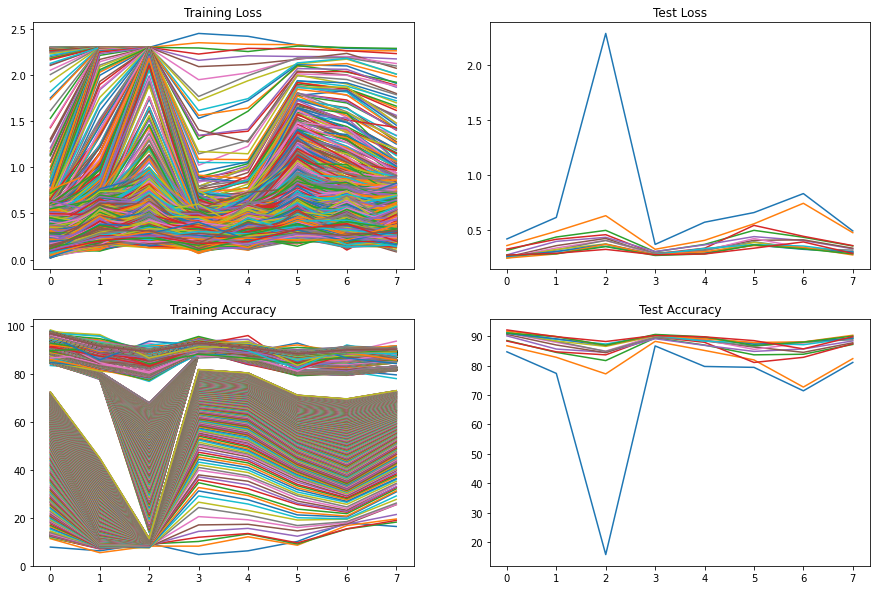

In [21]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_multiple(lines, labels):
  fig=plt.figure(figsize=(15,10))
  ax=fig.add_subplot(111)

  if len(lines) == len(labels):
    for line, label in zip(lines, labels):
      plt.plot(range(1, len(line)+1), line, label=label)

    plt.grid()
    plt.legend(loc=2)
    plt.show()
  else:
    print("Cannot Draw Graph, error")

In [0]:
labels = ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']

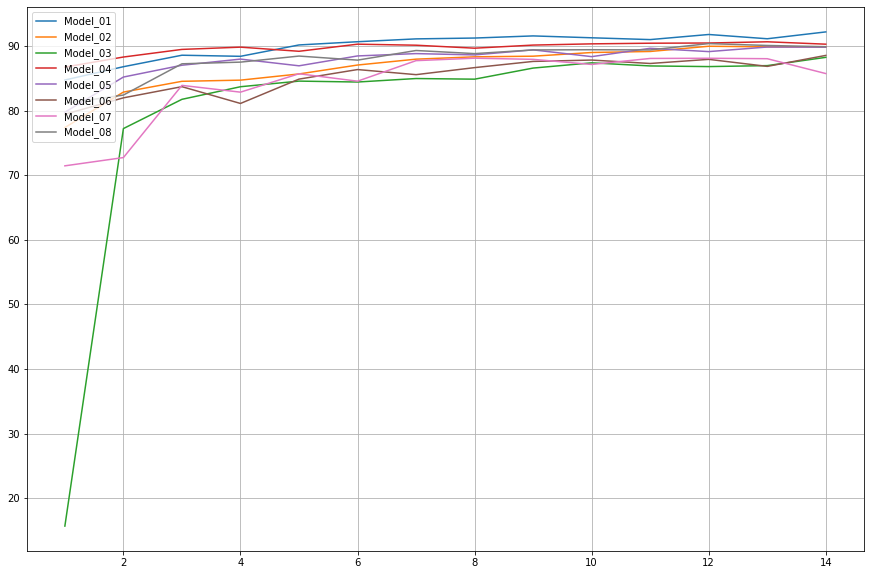

In [25]:
plot_multiple(test_acc, labels)

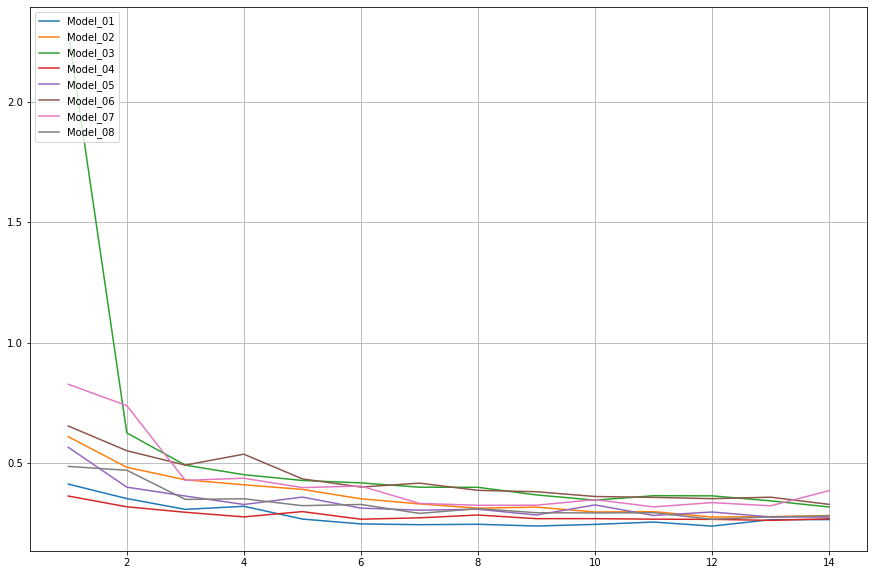

In [26]:
plot_multiple(test_losses, labels)

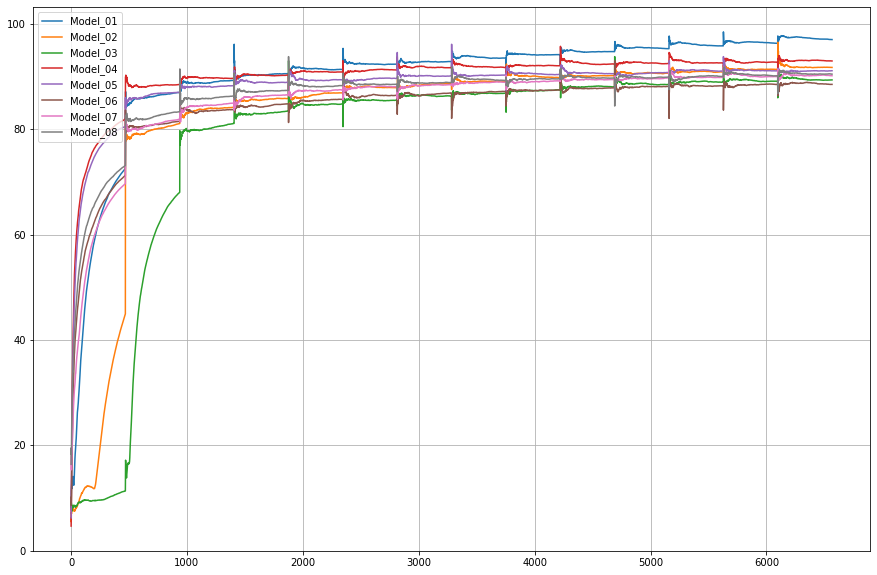

In [27]:
plot_multiple(train_acc, labels)